In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
import scipy.stats as stats 
import scipy.stats as st
import pingouin as pg
from datetime import date
from scipy.stats import shapiro, ttest_ind, f_oneway, kruskal, kstest, spearmanr


# Projet :

**Analyse des performances**: Analyse de la corrélation entre les scores de performance et des facteurs tels que  le genre, le salaire, nombre d'heures travaillées la taille de l’équipe ou le niveau d’éducation.

# Préparation des données à l'analyse

## Chargement et inspection des données

In [2]:
df=pd.read_csv("Extended_Employee_Performance_and_Productivity_Data.csv")

# Création d'une fonction permettant de charger et de d'inspecter les données.
def load_data(x):
    try :
        df=pd.read_csv(x)
        print('\n Importation des données réussi...')
        print(f"\n La dimension du jeu de données est:{df.shape}")
        print(f"\n Ensembles des colonnes du jeu de données: {df.columns.tolist()}")
        return df
    except Exception as e:
        print(f"Erreur de chargement: {e}")
        return None
              
load_data('Extended_Employee_Performance_and_Productivity_Data.csv')


 Importation des données réussi...

 La dimension du jeu de données est:(100000, 20)

 Ensembles des colonnes du jeu de données: ['Employee_ID', 'Department', 'Gender', 'Age', 'Job_Title', 'Hire_Date', 'Years_At_Company', 'Education_Level', 'Performance_Score', 'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled', 'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size', 'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score', 'Resigned']


,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Finance,Male,27,Technician,2022-12-07 08:03:05.556036,1,Bachelor,4,4900.0,55,46,5,3,75,16,48,2,1.28,False
99996,99997,IT,Female,36,Consultant,2018-07-24 08:03:05.556036,6,Master,5,8250.0,39,35,7,0,0,10,77,1,3.48,True
99997,99998,Operations,Male,53,Analyst,2015-11-24 08:03:05.556036,8,High School,2,4800.0,31,13,6,5,0,5,87,1,2.60,False
99998,99999,HR,Female,22,Consultant,2015-08-03 08:03:05.556036,9,High School,5,8250.0,35,43,10,1,75,2,31,1,3.10,False


### Nettoyage des données

In [3]:
# Recherche des valeurs manquantes et des doublons
print(f"Information sur le types et le nombre d'éléments par colonne: {df.info()}")
print(f"\n Afficharge du nombre de valeurs manquantes par colonne: {df.isnull().sum()}")
print(f"\n Afficharge du nombre de doublons: {df.duplicated(keep=False).sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

**Nos données ne contiennent ni de valeurs manquantes, ni de doublons. Par contre le type de certaines variables  telles que:**
    
**Employee_ID et Hire_Date , necessite d'etre formaté**
 

In [4]:
# Correction des erreurs de format
df['Hire_Date'] = pd.to_datetime(df['Hire_Date'])  # Convertir en format datetime
df['Employee_ID'] = df['Employee_ID'].astype(object)  # Convertir en entier

In [5]:
# Séparer la date et l'heure
df['date'] = df['Hire_Date'].dt.date # Extraire la date
df['time'] = df['Hire_Date'].dt.time  # Extraire l'heure
df

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,...,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned,date,time
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,...,22,2,0,14,66,0,2.63,False,2022-01-19,08:03:05.556036
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,...,13,14,100,12,61,2,1.72,False,2024-04-18,08:03:05.556036
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,...,6,3,50,10,1,0,3.17,False,2015-10-26,08:03:05.556036
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,...,28,12,100,10,0,1,1.86,False,2016-10-22,08:03:05.556036
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,...,29,13,100,15,9,1,1.25,False,2021-07-23,08:03:05.556036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Finance,Male,27,Technician,2022-12-07 08:03:05.556036,1,Bachelor,4,4900.0,...,5,3,75,16,48,2,1.28,False,2022-12-07,08:03:05.556036
99996,99997,IT,Female,36,Consultant,2018-07-24 08:03:05.556036,6,Master,5,8250.0,...,7,0,0,10,77,1,3.48,True,2018-07-24,08:03:05.556036
99997,99998,Operations,Male,53,Analyst,2015-11-24 08:03:05.556036,8,High School,2,4800.0,...,6,5,0,5,87,1,2.60,False,2015-11-24,08:03:05.556036
99998,99999,HR,Female,22,Consultant,2015-08-03 08:03:05.556036,9,High School,5,8250.0,...,10,1,75,2,31,1,3.10,False,2015-08-03,08:03:05.556036


In [6]:
# Suppression de la colonne Hire_Date 
df=df.drop(["Hire_Date"], axis=1)


In [7]:
# Statistique descriptive sur les données
df.describe()

,Age,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.029410,4.476070,2.995430,6403.211000,44.956950,24.431170,14.514930,7.008550,50.090500,10.013560,49.506060,0.999720,2.999088
std,11.244121,2.869336,1.414726,1372.508717,8.942003,14.469584,8.664026,4.331591,35.351157,5.495405,28.890383,0.815872,1.150719
min,22.000000,0.000000,1.000000,3850.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,31.000000,2.000000,2.000000,5250.000000,37.000000,12.000000,7.000000,3.000000,25.000000,5.000000,25.000000,0.000000,2.010000
50%,41.000000,4.000000,3.000000,6500.000000,45.000000,24.000000,15.000000,7.000000,50.000000,10.000000,49.000000,1.000000,3.000000
75%,51.000000,7.000000,4.000000,7500.000000,53.000000,37.000000,22.000000,11.000000,75.000000,15.000000,75.000000,2.000000,3.990000
max,60.000000,10.000000,5.000000,9000.000000,60.000000,49.000000,29.000000,14.000000,100.000000,19.000000,99.000000,2.000000,5.000000


#  Analyse des corrélations.

## Analyse de la relation entre le score de performance et le niveau d'étude.

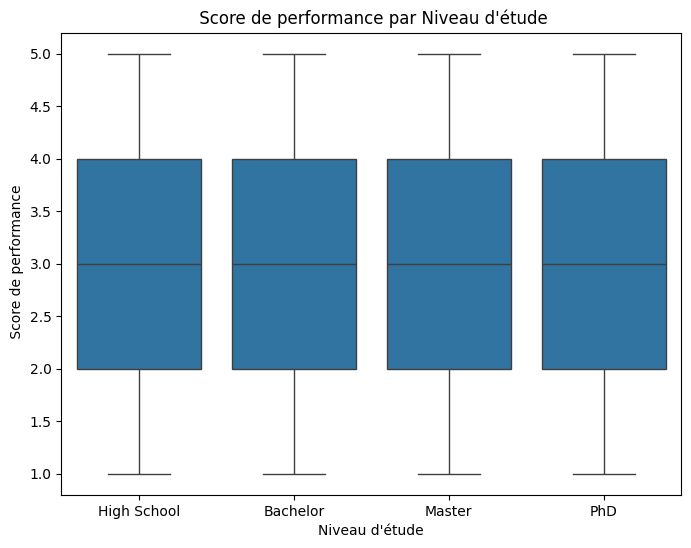

In [8]:
# Analyse graphique
plt.figure(figsize=(8,6))
sns.boxplot(x='Education_Level', y='Performance_Score', data=df)
plt.ylabel(" Score de performance")
plt.xlabel("Niveau d'étude")
plt.title(" Score de performance par Niveau d'étude")
plt.show()

In [9]:
Score_perf = df.groupby(['Education_Level', 'Performance_Score']).agg(Nbre=('Employee_ID', 'count'))
Score_perf=Score_perf.rename(columns={'Nbre':'Nbre_total_Emp'})
Score_perf=Score_perf.reset_index()
Score_perf
                    

,Education_Level,Performance_Score,Nbre_total_Emp
0,Bachelor,1,10127
1,Bachelor,2,10119
2,Bachelor,3,10035
3,Bachelor,4,9866
4,Bachelor,5,9894
5,High School,1,6057
6,High School,2,5928
7,High School,3,5974
8,High School,4,6047
9,High School,5,5998


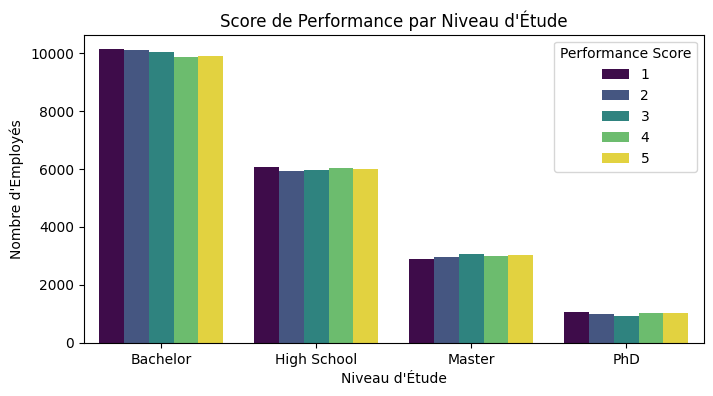

In [10]:
plt.figure(figsize=(8, 4))
sns.barplot(data=Score_perf, x='Education_Level', y='Nbre_total_Emp', hue='Performance_Score', palette='viridis')
plt.title('Score de Performance par Niveau d\'Étude')
plt.xlabel('Niveau d\'Étude')
plt.ylabel('Nombre d\'Employés')
plt.legend(title='Performance Score')
plt.show()


**Observation des graphiques**

L'analyse du premier graphique revèle  aucune différence entre  les répartitions des scores de performances par niveau  d'éducation, ce qui nous laisse penser qu'il n'y a aucune liaison entre le niveau d'éducation et le scrore de performnce.
<br/>Les répartitions sont casiment identique !

Mais en regardant  attentivenment on s'apperçoit d'une légère différence entre les répartions des scores de performances dans chaque niveau d'éducation.


**Vérifions nos observation à l'aide de Test Statistique**

### Test statistique pour vérifier la liaison

**Vérification des conditions de normalité pour le choix du test statistique approprié.**

c:\Users\HP 840 G3\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 50041.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\HP 840 G3\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30004.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\HP 840 G3\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14904.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\HP 840 G3\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N i

P_valeur de la normalité (shapiro_wilk) ShapiroResult(statistic=np.float64(0.8879468052404523), pvalue=np.float64(7.400127890755915e-100))
P_valeur de la normalité (shapiro_wilk)-High_School ShapiroResult(statistic=np.float64(0.8874458454833162), pvalue=np.float64(2.096119872724361e-88))
P_valeur de la normalité (shapiro_wilk)-Master ShapiroResult(statistic=np.float64(0.8892043357568883), pvalue=np.float64(1.0719334530612865e-72))
P_valeur de la normalité (shapiro_wilk)-PhD ShapiroResult(statistic=np.float64(0.8842313187121013), pvalue=np.float64(6.809168081306414e-52))


Text(0.5, 1.0, 'PhD')

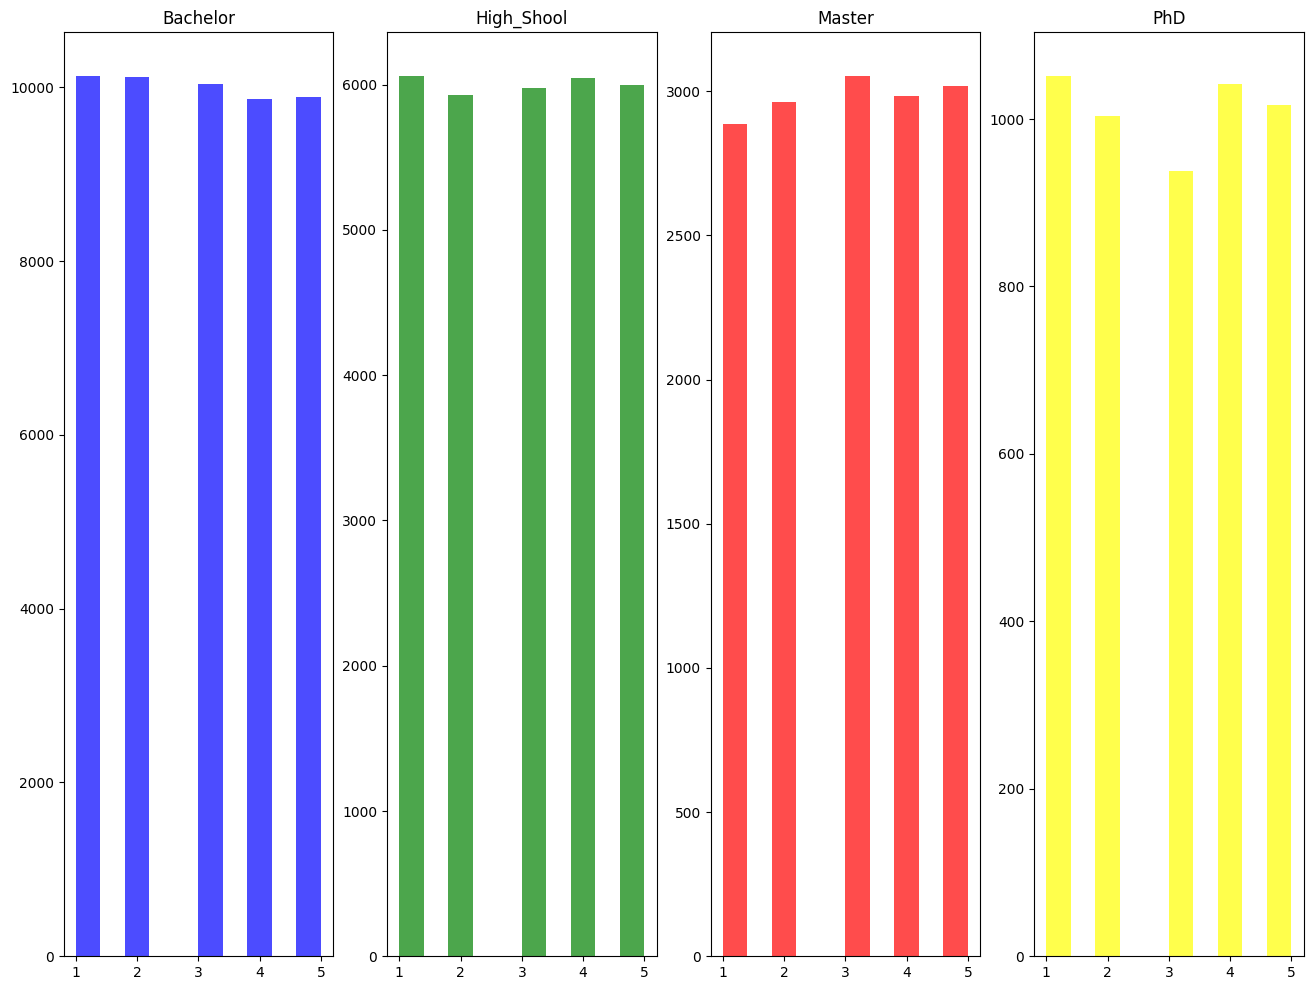

In [11]:
# Séparation des groupes
Bachelor=df[df['Education_Level']=='Bachelor']['Performance_Score']
High_School=df[df['Education_Level']=='High School']['Performance_Score']
Master=df[df['Education_Level']=='Master']['Performance_Score']
PhD=df[df['Education_Level']=='PhD']['Performance_Score']

# Test de normalité des groupe au sein de la variable qualitative.
Bachelor_p_value=shapiro(Bachelor)
High_School_p_value=shapiro(High_School)
Master_p_value=shapiro(Master)
PhD_p_value=shapiro(PhD)

print("P_valeur de la normalité (shapiro_wilk)", Bachelor_p_value )
print("P_valeur de la normalité (shapiro_wilk)-High_School", High_School_p_value)
print("P_valeur de la normalité (shapiro_wilk)-Master", Master_p_value )
print("P_valeur de la normalité (shapiro_wilk)-PhD", PhD_p_value )

# Histogramme pour vérifier la normalité

plt.figure(figsize=(16,12))
plt.subplot(141)
plt.hist(Bachelor, bins=10, color='blue', alpha=0.7)
plt.title('Bachelor')

plt.subplot(142)
plt.hist(High_School, bins=10, color='green', alpha=0.7)
plt.title('High_Shool')

plt.subplot(143)
plt.hist(Master, bins=10, color='red', alpha=0.7)
plt.title('Master')

plt.subplot(144)
plt.hist(PhD, bins=10, color='yellow', alpha=0.7)
plt.title('PhD')

De cette analyse, il en resort que la distribution des différents groupes qui constituent la variable qualitative "Education_Level" n'est pas normale. Par conséquent, nous allons utiliser un test statique non paramétrique.

Nous sommes en présence d'une variable qualitative qui comprend 3 modalités, le test non paramétrique approprié dans ce cas est le test H de Kruskal-Wallis.


In [12]:
# test de Kruskal-Wallis
kruskal_stat, kruska_p_value =kruskal(Bachelor,High_School,Master,PhD)
print("Statistique H de Kruskal-Wallis :",kruskal_stat)
print("p_valeur (Kruskal-Wallis) :",kruska_p_value)

Statistique H de Kruskal-Wallis : 7.025813074952774
p_valeur (Kruskal-Wallis) : 0.07107955714881684


**Synthèse de la corrélation entre les scores de performances et le niveau d'éducation**

<br/>On obtient la Statistique H de Kruskal-Wallis d'environ 7 et une p-value supérieure à 0,05.
<br/> On accepte l'hypothèse nulle, par conséquent pas de différence significative  entre les médianes des différents groupes!

## Analyse de la relation entre le score de performance et le salaire

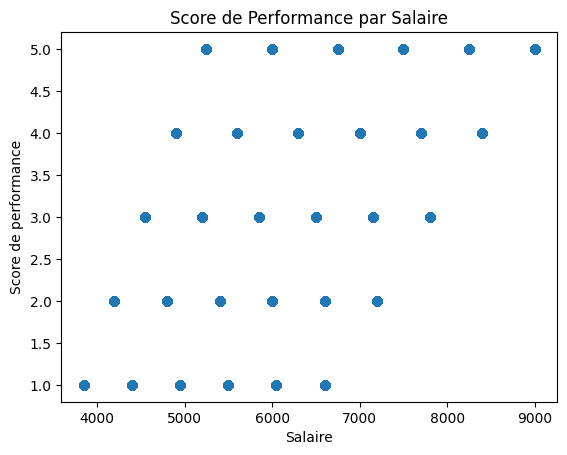

In [13]:
plt.scatter(df['Monthly_Salary'],df['Performance_Score'])
plt.title('Score de Performance par Salaire')
plt.xlabel('Salaire')
plt.ylabel('Score de performance')
plt.show()

**Observation graphique**

En observant ce graphique, nous constatons que le score de performance évolut  en meme temps que le salaire. Ce qui peut nous laisser pensé qu'il existe une corrélation linéaire entre le Salaire et le score de performance de l'employé.

**Vérifions cette hypothèse de corrélation linéaire entre le salaire et score de performance à l'aide d'un test statistique**.



**Vérification des conditions de normalité pour le choix du test statistique approprié.**

P_valeur de la normalité (Kolmogorov-Smirnov)-Perf_score KstestResult(statistic=np.float64(0.8413447460685429), pvalue=np.float64(0.0), statistic_location=np.int64(1), statistic_sign=np.int8(-1))
P_valeur de la normalité (Kolmogorov-Smirnov)-Perf_score KstestResult(statistic=np.float64(1.0), pvalue=np.float64(0.0), statistic_location=np.float64(3850.0), statistic_sign=np.int8(-1))


Text(0.5, 1.0, 'High_Shool')

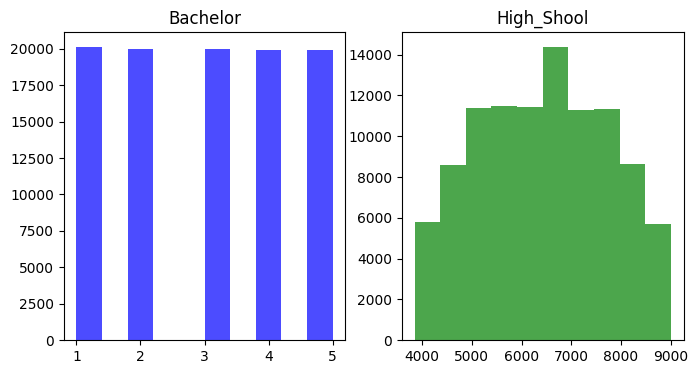

In [14]:
# Test de normalité de Kolmogorov-Smirnov
perf_sco_p_value=kstest(df['Performance_Score'], 'norm')
Mon_Sal_p_value=kstest(df['Monthly_Salary'], 'norm')
print("P_valeur de la normalité (Kolmogorov-Smirnov)-Perf_score",perf_sco_p_value)
print("P_valeur de la normalité (Kolmogorov-Smirnov)-Perf_score",Mon_Sal_p_value)

# Histogramme pour vérifier la normalité

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.hist(df['Performance_Score'], bins=10, color='blue', alpha=0.7)
plt.title('Bachelor')

plt.subplot(122)
plt.hist(df['Monthly_Salary'], bins=10, color='green', alpha=0.7)
plt.title('High_Shool')


De cette analyse, il en resort que la distribution des deux variables quantitatives n'est pas normale. Par conséquent, nous allons utiliser un test statistique non paramétrique.

Nous sommes en présence de deux  variables quantitatives  qui ne sont pas distribuées normalement, le test non paramétrique approprié dans ce cas est le test de corrélation de Spearman.


In [15]:
correlation, p_value = spearmanr(df['Performance_Score'], df['Monthly_Salary'])

print(f"Spearman's rank correlation: {correlation}")
print(f"P-value: {p_value}")



Spearman's rank correlation: 0.477761298901028
P-value: 0.0


**Synthèse des résultats**

On obtient un coéfficient de corrélation de Spearman de 0.477, ce qui montre l'existence d'une corrélation linéaire positive entre Le Salaire et Score de Performance de l'employé.
De plus, la p_valeur est inférieure à 0.5.
On rejette donc l'hypothèse nulle, par conséquent il existe une relation monotone entre les deux variables.

## Analyse de la relation entre le score de performance et le nombre d'heure travaillée par semaine

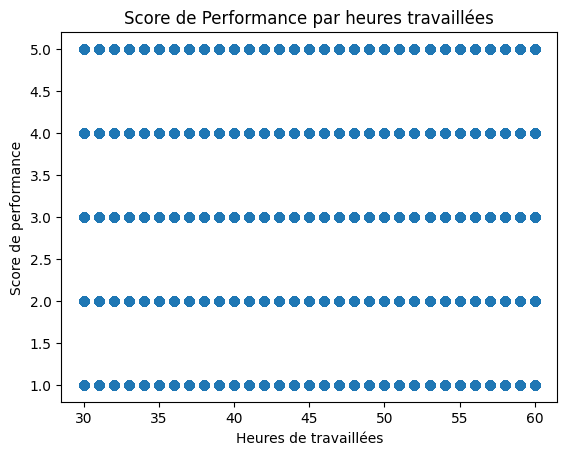

In [16]:
plt.scatter(df['Work_Hours_Per_Week'],df['Performance_Score'])
plt.title('Score de Performance par heures travaillées')
plt.xlabel('Heures de travaillées')
plt.ylabel('Score de performance')
#plt.legend(title='Performance Score')
plt.show()

**Observation graphique**

L'analyse de ce nuage de point revèle l'abscence de relation liant le score de performance de l'employé au nombre d'heure travaillée par semaine. Ce qui peut nous laisser pensé qu'il n'existe de relation entre le Salaire et le score de performance de l'employé.

**Vérifions cette hypothèse de l'abscence de toute relation entre le nombre d'heure travaillée par semaine et le score de performance de l'employé à l'aide d'un test statistique**.



P_valeur de la normalité (Kolmogorov-Smirnov)-Perf_score KstestResult(statistic=np.float64(0.8413447460685429), pvalue=np.float64(0.0), statistic_location=np.int64(1), statistic_sign=np.int8(-1))
P_valeur de la normalité (Kolmogorov-Smirnov)-Work_Hours KstestResult(statistic=np.float64(1.0), pvalue=np.float64(0.0), statistic_location=np.int64(30), statistic_sign=np.int8(-1))


Text(0.5, 1.0, "Nombre d'heures travaillées par semaine")

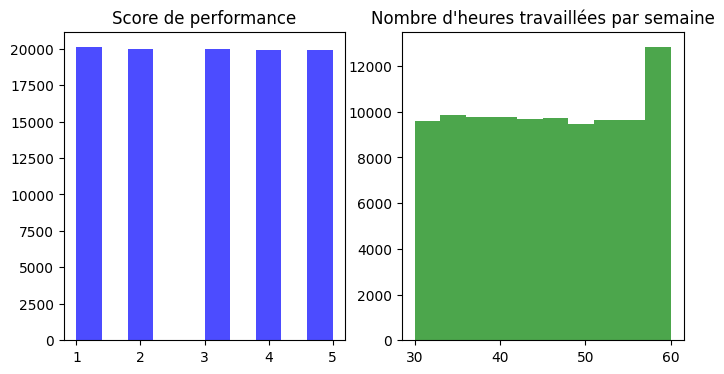

In [17]:
# Test de normalité de Kolmogorov-Smirnov
perf_sco_p_value=kstest(df['Performance_Score'], 'norm')
Work_Hours_p_value=kstest(df['Work_Hours_Per_Week'], 'norm')
print("P_valeur de la normalité (Kolmogorov-Smirnov)-Perf_score",perf_sco_p_value)
print("P_valeur de la normalité (Kolmogorov-Smirnov)-Work_Hours",Work_Hours_p_value)

# Histogramme pour vérifier la normalité

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.hist(df['Performance_Score'], bins=10, color='blue', alpha=0.7)
plt.title("Score de performance")

plt.subplot(122)
plt.hist(df['Work_Hours_Per_Week'], bins=10, color='green', alpha=0.7)
plt.title("Nombre d'heures travaillées par semaine")


De cette analyse, il en resort que la distribution des deux variables quantitatives n'est pas normale. Par conséquent, nous allons utiliser un test statistique non paramétrique.

Nous sommes en présence de deux  variables quantitatives  qui ne sont pas distribuées normalement, le test non paramétrique approprié dans ce cas est le test de corrélation de Spearman.


In [18]:
correlation, p_value = spearmanr(df['Performance_Score'], df['Work_Hours_Per_Week'])

print(f"Spearman's rank correlation: {correlation}")
print(f"P-value: {p_value}")

Spearman's rank correlation: -0.005625896510790073
P-value: 0.07523049544334955


**Synthèse des résultats**

On obtient un coéfficient de corrélation de Spearman de -0.005, ce qui montre l'existence d'une très faire corrélation linéaire négative entre  Score de Performance de l'employé et le nombre d'heures travaillées par semaine.
De plus, la p_valeur est supérieur à 0.5.
On accepte donc l'hypothèse nulle, par conséquent il n'existe pas de relation monotone entre le score de performance et le nombre d'heures travaillées.

## Analyse de la relation entre le score de performance et la taille de l'équipe du colaborateur

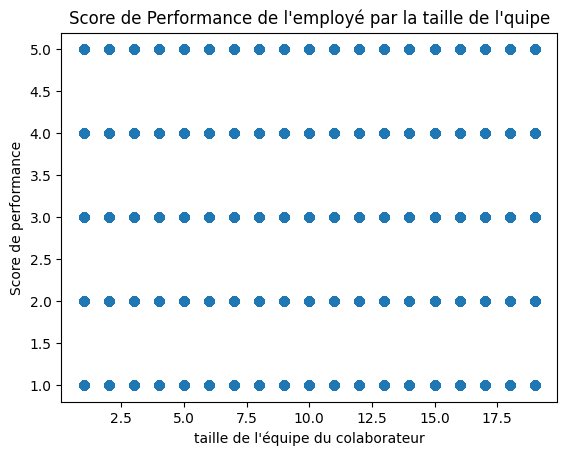

In [19]:
plt.scatter(df['Team_Size'],df['Performance_Score'])
plt.title("Score de Performance de l'employé par la taille de l'quipe")
plt.xlabel("taille de l'équipe du colaborateur")
plt.ylabel('Score de performance')
#plt.legend(title='Performance Score')
plt.show()

**Observation graphique**

L'analyse de ce nuage de point revèle l'abscence de relation liant le score de performance de l'employé et la taille de son équipe. Ce qui peut nous laisser pensé qu'il n'existe de relation entre la taille de l'équipe et le score de performance de l'employé.

**Vérifions cette hypothèse de l'abscence de toute relation entre la taille de l'équipe et le score de performance de l'employé à l'aide d'un test statistique**.



In [20]:
correlation, p_value = spearmanr(df['Performance_Score'], df['Team_Size'])

print(f"Spearman's rank correlation: {correlation}")
print(f"P-value: {p_value}")

Spearman's rank correlation: -0.005156713797736713
P-value: 0.10295647789860322


**Synthèse des résultats**

On obtient un coéfficient de corrélation de Spearman de -0.005, ce qui montre l'existence d'une très faire corrélation linéaire négative entre  Score de Performance de l'employé et la taille de son équipe.
De plus, la p_valeur est supérieur à 0.5.
On accepte donc l'hypothèse nulle, par conséquent il n'existe pas de relation monotone entre le score de performance et la taille de l'équipe de l'employé.

## Analyse de la relation entre le score de performance et le genre de l'employé

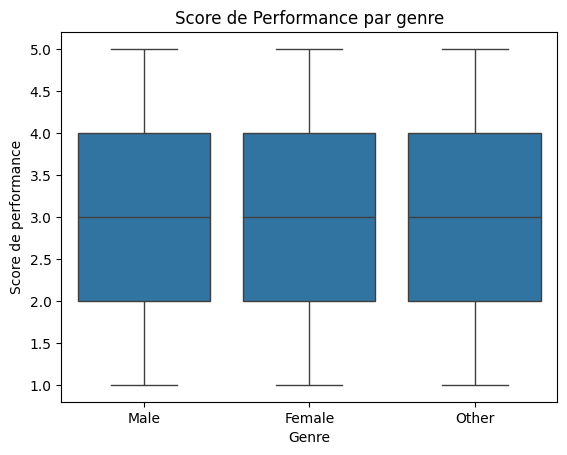

In [21]:
sns.boxplot(x='Gender',y='Performance_Score', data=df)
plt.title('Score de Performance par genre')
plt.xlabel('Genre')
plt.ylabel('Score de performance')
#plt.legend(title='Performance Score')
plt.show()

In [22]:
Scor_perf_genre = df.groupby('Gender')['Performance_Score'].count()
Scor_perf_genre 

Gender
Female    48001
Male      48031
Other      3968
Name: Performance_Score, dtype: int64

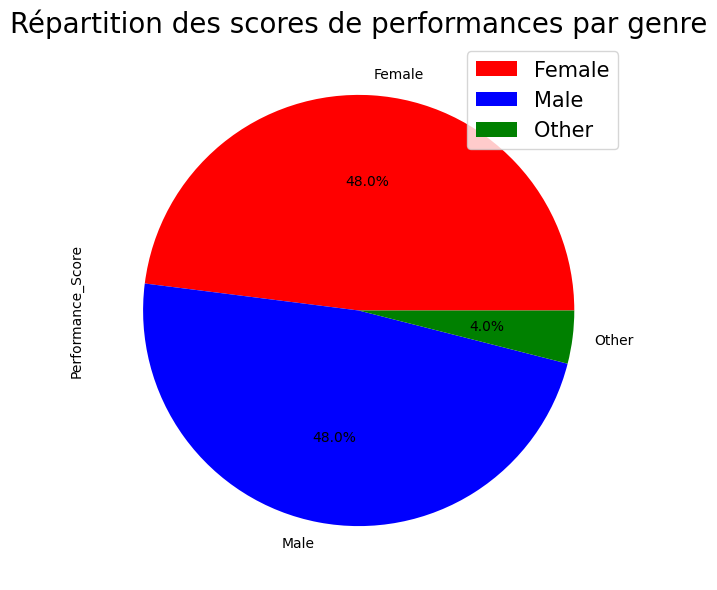

In [23]:
colors = ['red', 'blue', 'green']
Scor_perf_genre.plot.pie(colors = colors, figsize=(7, 7), autopct = "%1.1f%%")
plt.title("Répartition des scores de performances par genre", size = 20)
plt.legend(['Female','Male','Other '], fontsize = 15)
plt.show()

c:\Users\HP 840 G3\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 48001.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\HP 840 G3\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 48031.
  res = hypotest_fun_out(*samples, **kwds)


P_valeur de la normalité (shapiro_wilk)-Female ShapiroResult(statistic=np.float64(0.8886380283993689), pvalue=np.float64(9.339889790330387e-99))
P_valeur de la normalité (shapiro_wilk)-Male ShapiroResult(statistic=np.float64(0.8870858919562712), pvalue=np.float64(4.019663373189757e-99))
P_valeur de la normalité (shapiro_wilk)-Other ShapiroResult(statistic=np.float64(0.8863676638297926), pvalue=np.float64(3.176983885763298e-47))


Text(0.5, 1.0, 'Other')

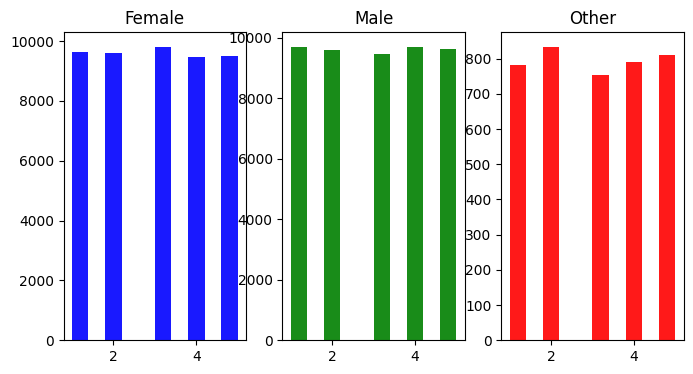

In [24]:
# Séparation des groupe
Female=df[df['Gender']=='Female']['Performance_Score']
Male=df[df['Gender']=='Male']['Performance_Score']
Other=df[df['Gender']=='Other']['Performance_Score']

# Test de normalité des groupe au sein de la variable qualitative.
Female_p_value=shapiro(Female)
Male_p_value=shapiro(Male)
Other_p_value=shapiro(Other)

print("P_valeur de la normalité (shapiro_wilk)-Female", Female_p_value )
print("P_valeur de la normalité (shapiro_wilk)-Male", Male_p_value)
print("P_valeur de la normalité (shapiro_wilk)-Other", Other_p_value )


# Histogramme pour vérifier la normalité

plt.figure(figsize=(8,4))
plt.subplot(131)
plt.hist(Female, bins=10, color='blue', alpha=0.9)
plt.title('Female')

plt.subplot(132)
plt.hist(Male, bins=10, color='green', alpha=0.9)
plt.title('Male')

plt.subplot(133)
plt.hist(Other, bins=10, color='red', alpha=0.9)
plt.title('Other')


De cette analyse, il en resort que la distribution des différents groupes qui constituent la variable qualitative "Gender" n'est pas normale. Par conséquent, nous allons utiliser un test statique non paramétrique.

Nous sommes en présence d'une variable qualitative qui comprend 3 modalités, le test non paramétrique approprié dans ce cas est le test H de Kruskal-Wallis.


In [25]:
# test de Kruskal-Wallis
kruskal_stat, kruska_p_value =kruskal(Female,Male,Other)
print("Statistique H de Kruskal-Wallis :",kruskal_stat)
print("p_valeur (Kruskal-Wallis) :",kruska_p_value)

Statistique H de Kruskal-Wallis : 1.1673754061318156
p_valeur (Kruskal-Wallis) : 0.5578374300389777


**Synthèse de la corrélation entre les scores de performances et le genre de l'employé**

<br/>On obtient la Statistique H de Kruskal-Wallis d'environ 1.167 et une p-value supérieure à 0,05.
<br/> On accepte l'hypothèse nulle, par conséquent pas de différence significative  entre les médianes des différents groupes!

**Conclusion**

Il n'existe pas de liaison entre le genre de l'employé et son score de performance.

# Synthèse des résultats.

Nous retenons de cette analyse les résultats suvants:
     
- L'existence d'une faible  liaison linéaire entre le score de performance de l'employé et son salaire.
- Absence de relation entre le score de performance de l'employé et les variables telles que: le Genre, la taille de l'équipe, les heures travaillées par semaine et le niveau d'éducation.